# Data Workflow Lab 1

Clean and summarize Project 3 data.

### Learning Objectives

* Practice text cleaning techniques
* Practice datatype conversion
* Practice filling in missing values with either 0 or the average in the column
* Practice categorical data techniques
* Transform data into usable quantities


In [8]:
pwd

u'/Users/toddmoffett1/DSI/dsi_workspace/curriculum/week-04/3.1-pandas-p3-eda'

In [52]:
% matplotlib inline
import datetime
import numpy as np
import pandas as pd

In [53]:
# Load the data
df = pd.read_csv("/Users/toddmoffett1/DSI/dsi_workspace/project-3/Iowa_Liquor_sales_sample_10pct.csv")
print df.columns
df.head()

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


## Clean the data

Let's practice our data cleaning skills on the Project 3 dataset. If you don't remember how to do any of these tasks, look back at your work from the previous weeks or search the internet. There are many blog articles and Stack Overflow posts that cover these topics.

You'll want to complete at least the following tasks:
* Remove redundant columns
* Remove "$" prices from characters and convert values to floats.
* Convert dates to pandas datetime objects
* Convert category floats to integers
* Drop or fill in bad values

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269810 entries, 0 to 270954
Data columns (total 15 columns):
Date                     269810 non-null datetime64[ns]
Store Number             269810 non-null int64
City                     269810 non-null object
Zip Code                 269810 non-null object
County Number            269810 non-null int64
Category                 269810 non-null int64
Vendor Number            269810 non-null int64
Item Number              269810 non-null int64
Bottle Volume (ml)       269810 non-null int64
State Bottle Cost        269810 non-null float64
State Bottle Retail      269810 non-null float64
Bottles Sold             269810 non-null int64
Sale (Dollars)           269810 non-null float64
Volume Sold (Liters)     269810 non-null float64
Volume Sold (Gallons)    269810 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(7), object(2)
memory usage: 32.9+ MB


In [55]:
# Remove redundant columns
del df["Category Name"]
del df["Item Description"]
del df["County"]


In [56]:
# Remove $ from certain columns
# Remove $ from certain columns
cols = ["State Bottle Cost", "State Bottle Retail", "Sale (Dollars)"]

for col in cols:
    df[col] = df[col].apply(lambda x: float(x[1:]))

In [57]:
mystring = "$500"
mystring[1:]

'500'

In [58]:
# Convert dates
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

In [90]:
df.sample(10)

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Liter
262303,2015-06-10,3773,CEDAR RAPIDS,52401,57,1031080,434,36307,1000,4.05,6.08,12,72.96,12.00,3.17,24.36,6.080000
53223,2015-09-01,4298,DYSART,52224,86,1031080,434,36308,1750,7.17,10.76,6,64.56,10.50,2.77,21.54,6.148571
171431,2015-05-18,2190,DES MOINES,50314,77,1081900,65,902031,750,6.30,9.45,12,113.40,9.00,2.38,37.80,12.600000
216784,2015-07-15,2835,CEDAR FALLS,50613,7,1081200,260,68038,1750,26.49,39.74,3,119.22,5.25,1.39,39.75,22.708571
112915,2015-12-29,4650,SWEA CITY,50590,55,1012100,421,12888,1750,8.98,13.47,6,80.82,10.50,2.77,26.94,7.697143
34904,2016-03-15,2641,COUNCIL BLUFFS,51501,78,1011200,65,27780,500,4.70,7.05,4,28.20,2.00,0.53,9.40,14.100000
71762,2016-02-29,2662,MUSCATINE,52761,70,1042100,35,28206,750,10.50,15.75,2,31.50,1.50,0.40,10.50,21.000000
41899,2015-09-21,4504,INDIANOLA,50125,91,1081600,421,64870,100,0.89,1.34,96,128.64,9.60,2.54,43.20,13.400000
86015,2015-07-23,3054,GRINNELL,50112,79,1042100,260,28866,750,12.25,18.38,3,55.14,2.25,0.59,18.39,24.506667
244651,2015-08-24,4312,COUNCIL BLUFFS,51501,78,1032200,370,34029,1000,14.99,22.49,12,269.88,12.00,3.17,90.00,22.490000


In [60]:
# Drop or replace bad values
df = df.dropna()


# Convert integers
df["County Number"] = df["County Number"].astype(int)
df["Category"] = df["Category"].astype(int)
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9,1051100,55,54436,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82,1011100,395,27605,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7,1011200,65,19067,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85,1071100,395,59154,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99,1031080,297,35918,1750,7.20,10.80,12,129.60,21.0,5.55


## Filter the Data

Some stores may have opened or closed in 2015. These data points will heavily skew our models, so we need to filter them out or find a way to deal with them.

You'll need to provide a summary in your project report about these data points. You may also consider using the monthly sales in your model and including other information (number of months or days each store is open) in your data to handle these unusual cases.

Let's record the first and last sales dates for each store. We'll save this information for later when we fit our models.

In [62]:
# Determine which stores were open all of 2015
# Find the first and last sales date.
dates = df.groupby(by=["Store Number"], as_index=False)


dates = dates.agg({"Date": [np.min, np.max]})
dates.columns = [''.join(col).strip() for col in dates.columns.values]

# Filter out stores that opened or closed throughout the year
lower_cutoff = pd.Timestamp('20150301')
upper_cutoff = pd.Timestamp('20151001')

mask = (dates['Dateamin'] < lower_cutoff) & (dates['Dateamax'] > upper_cutoff)
# You may want to save this step until you start modelling
good_stores = dates[mask]['Store Number']

In [63]:
df = df[df['Store Number'].isin(good_stores)]

In [64]:
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9,1051100,55,54436,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82,1011100,395,27605,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7,1011200,65,19067,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85,1071100,395,59154,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99,1031080,297,35918,1750,7.20,10.80,12,129.60,21.0,5.55


In [28]:
dates.head()

,Store Number,Dateamin,Dateamax
0,2106,2015-01-08,2016-03-31
1,2113,2015-01-07,2016-03-23
2,2130,2015-01-08,2016-03-31
3,2152,2015-01-08,2016-02-25
4,2178,2015-01-07,2016-03-30


In [65]:
import seaborn as sns

## Compute New Columns and Tables

Since we're trying to predict sales and/or profits, we'll want to compute some intermediate data. There are a lot of ways to do thisand good use of pandas is crucial. For example, for each transaction we may want to know:
* margin, retail cost minus bottle cost
* price per bottle
* price per liter

We'll need to make a new dataframe that indexes quantities by store:
* sales per store for all of 2015
* sales per store for Q1 2015
* sales per store for Q1 2016
* total volumes sold
* mean transaction revenue, gross margin, price per bottle, price per liter, etc.
* average sales per day
* number of days open

Make sure to retain other variables that we'll want to use to build our models, such as zip code, county number, city, etc. We recommend that you spend some time thinking about the model you may want to fit and computing enough of the suggested quantities to give you a few options.

Bonus tasks:
* Restrict your attention to stores that were open for all of 2015 and Q1 2016. Stores that opened or closed in 2015 will introduce outliers into your data.
* For each transaction we have the item category. You may be able to determine the store type (primarily wine, liquor, all types of alcohol, etc.) by the most common transaction category for each store. This could be a useful categorical variable for modelling. 

In [66]:
# Margin and Price per liter
df['Margin'] = (df['State Bottle Retail'] - df['State Bottle Cost']) * df['Bottles Sold']
df['Price per Liter'] = df['Sale (Dollars)'] / df['Volume Sold (Liters)']

In [67]:
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Liter
0,2015-11-04,3717,SUMNER,50674,9,1051100,55,54436,750,4.50,6.75,12,81.00,9.0,2.38,27.00,9.000000
1,2016-03-02,2614,DAVENPORT,52807,82,1011100,395,27605,750,13.75,20.63,2,41.26,1.5,0.40,13.76,27.506667
2,2016-02-11,2106,CEDAR FALLS,50613,7,1011200,65,19067,1000,12.59,18.89,24,453.36,24.0,6.34,151.20,18.890000
3,2016-02-03,2501,AMES,50010,85,1071100,395,59154,1750,9.50,14.25,6,85.50,10.5,2.77,28.50,8.142857
4,2015-08-18,3654,BELMOND,50421,99,1031080,297,35918,1750,7.20,10.80,12,129.60,21.0,5.55,43.20,6.171429


In [68]:
# Sales per store, 2015

# Filter by our start and end dates
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20151231")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
sales = df[mask]

# Group by store name
sales = sales.groupby(by=["Store Number"], as_index=False)
# Compute sums, means
sales = sales.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})
# Collapse the column indices
sales.columns = [' '.join(col).strip() for col in sales.columns.values]
# Rename columns

# Quick check
sales.head()

,Store Number,City <lambda>,Sale (Dollars) sum,Sale (Dollars) mean,County Number <lambda>,Price per Liter mean,Zip Code <lambda>,Volume Sold (Liters) sum,Volume Sold (Liters) mean,Margin mean
0,2106,CEDAR FALLS,146326.22,277.658861,7,17.856601,50613,9731.85,18.466509,92.671879
1,2113,GOWRIE,9310.22,63.334830,94,18.507700,50543,659.85,4.488776,21.149932
2,2130,WATERLOO,111871.43,285.386301,7,16.835809,50703,6891.37,17.580026,95.217347
3,2152,ROCKWELL,7721.08,54.759433,17,13.020765,50469,633.37,4.491986,18.351277
4,2178,WAUKON,24324.18,102.633671,3,16.053844,52172,1917.12,8.089114,34.454430


In [84]:
(df[df.isnull()]).count()

Date                     0
Store Number             0
City                     0
Zip Code                 0
County Number            0
Category                 0
Vendor Number            0
Item Number              0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
Margin                   0
Price per Liter          0
dtype: int64

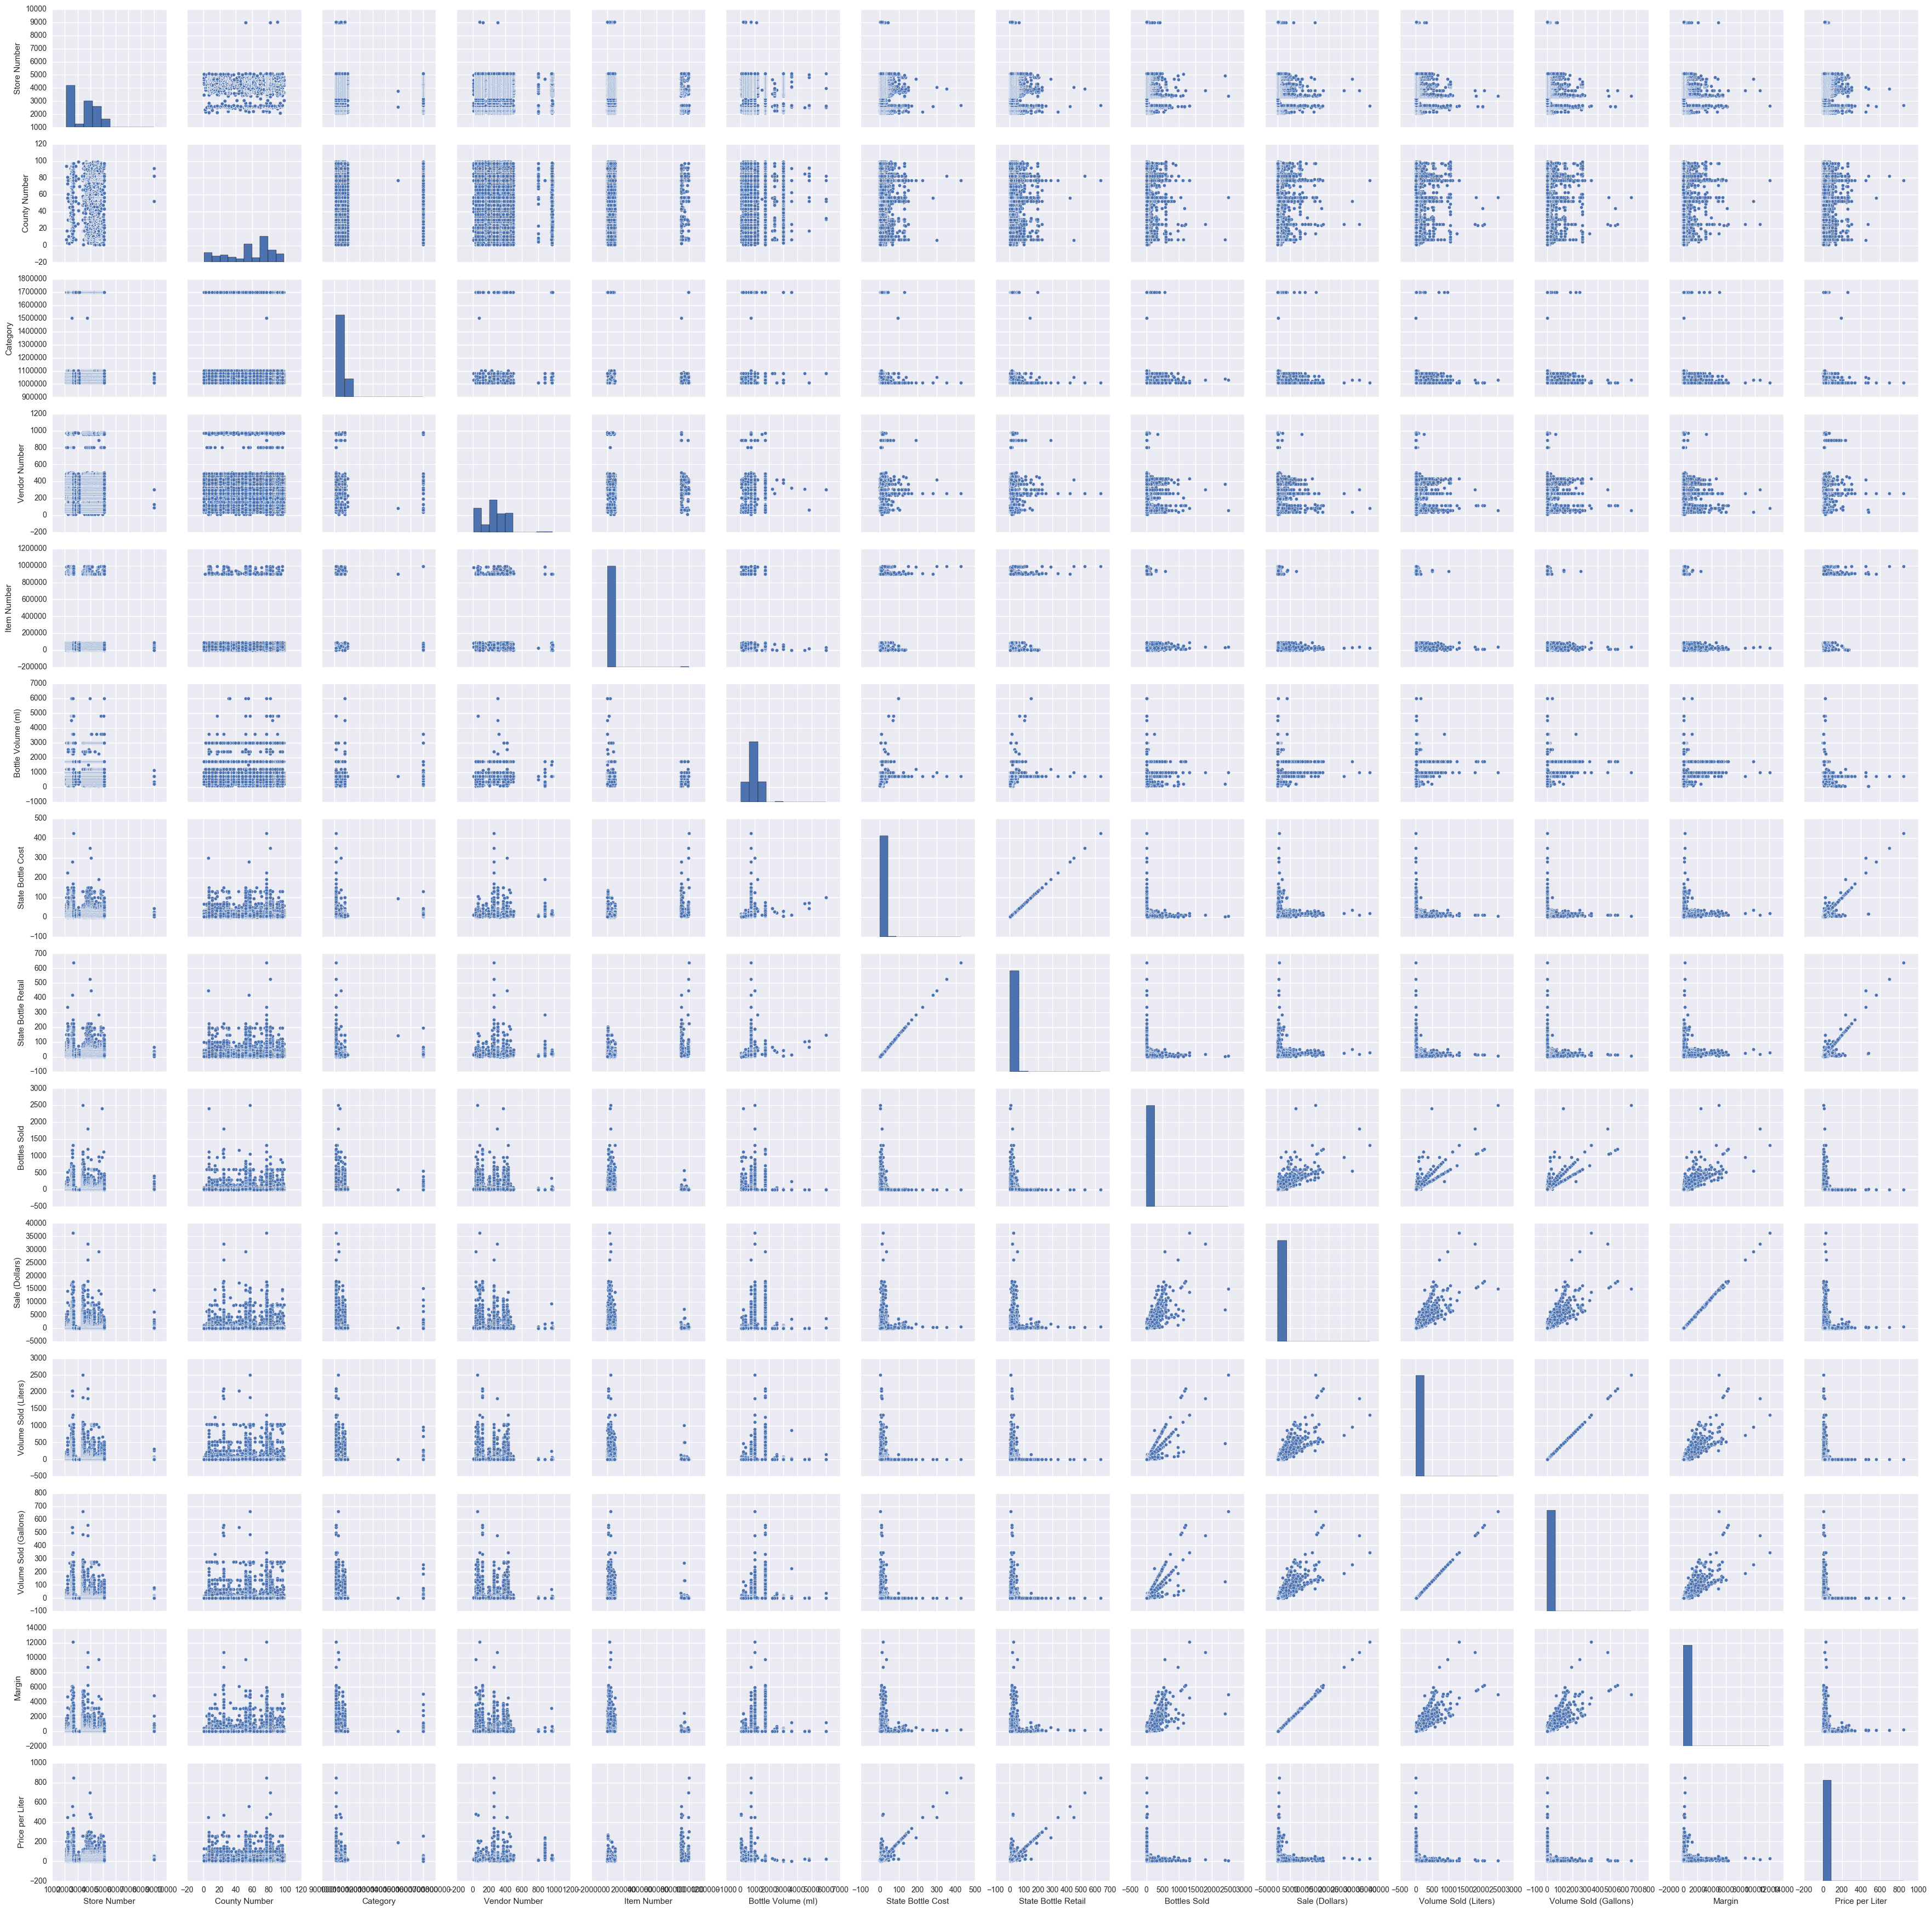

In [85]:
sns.pairplot(df)

In [88]:
df_sales = sales.groupby(['County','Margin'])

KeyError: 'County'

In [ ]:
fig, ax = plt.subplots(2, figsize=(16, 8))
fig.subplots_adjust(hspace=0.4)
by_date.iloc[:, 0].plot(ax=ax[0], title='Annual Members');
by_date.iloc[:, 1].plot(ax=ax[1], title='Day-Pass Users');

In [ ]:
# Q1 sales, may want to also use aggregate as above to have more columns (means, etc.)

# Sales 2015  Q1

# Sales 2016 Q1


Proceed with any calculations that you need for your models, such as grouping
sales by zip code, most common vendor number per store, etc. Once you have finished adding columns, be sure to save the dataframe.

In [ ]:
# Compute more things
# ...

In [ ]:
# Save this dataframe

# Let's add the dates computed above to this data.
sales["First Date"] = dates['Date amin']
sales["Last Date"] = dates['Date amax']

sales.to_csv("sales.csv")